# PyORBIT output.mat comparison

Compare:
- **OG**: old PTC + CERN PyORBIT (Original - PSB Example provided in Hannes Bartosik's PyORBIT build)
- **newPTC**: new PTC + CERN Merged PyORBIT (master + newPTC branch) 
- **NOTE**: The version of PTC used to create the initial flat file is unknown

In [1]:
import os
import glob
import imageio
import pickle
import pandas as pd
import numpy as np
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.5, 5.0]
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 8

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.markersize'] = 5

In [3]:
def round_sig(x, sig=3):
        return round(x, sig-int(floor(log10(abs(x))))-1)
    
def is_non_zero_file(fpath):  
        print ('\n\t\t\tis_non_zero_file:: Checking file ', fpath)
        print ('\n\t\t\tis_non_zero_file:: File exists = ', os.path.isfile(fpath))
        print ('\n\t\t\tis_non_zero_file:: Size > 3 bytes = ', os.path.getsize(fpath))
        return os.path.isfile(fpath) and os.path.getsize(fpath) > 3

In [4]:
def add_input_file(dd, filename, label):
    f = filename
    p = dict()
    sio.loadmat(f, mdict=p)
    dd[label] = p
    print ('\tAdded output data from ', filename, '\t dictionary key: ', label)
    return dd

In [5]:
def make_directory(path):
    if os.path.isdir(path):
        print ("Directory %s already exists" % path)  
    else:
        try:
            os.mkdir(path)
        except OSError:
            print ("Creation of the directory %s failed" % path)
        else:
            print ("Successfully created the directory %s" % path)  

In [6]:
! pwd

/home/HR/Repositories/PTC_PyORBIT_Tests/01_Merged_PyORBIT_Test/PSB/Acceleration_Test_NoSC


In [7]:
! ls 

Output_playground_PSB_newPTC.ipynb  Plots  SCARF_Merged_HR_PyORBIT


In [8]:
! ls SCARF_Merged_HR_PyORBIT/output/

output.mat


In [9]:
dd1 = dict()

dd1 = add_input_file(dd1, '../../../00_NewPTC_Test/PSB/oldPTC/CERN_PSB_spacecharge_AFS/Output/output.dat.mat', 'OG')
dd1 = add_input_file(dd1, '../../../00_NewPTC_Test/PSB/newPTC/CERN_PSB_spacecharge_AFS/Output/output.dat.mat', 'newPTC')
dd1 = add_input_file(dd1, './SCARF_Merged_HR_PyORBIT/output/output.mat', 'Merged HR PyORBIT')

	Added output data from  ../../../00_NewPTC_Test/PSB/oldPTC/CERN_PSB_spacecharge_AFS/Output/output.dat.mat 	 dictionary key:  OG
	Added output data from  ../../../00_NewPTC_Test/PSB/newPTC/CERN_PSB_spacecharge_AFS/Output/output.dat.mat 	 dictionary key:  newPTC
	Added output data from  ./SCARF_Merged_HR_PyORBIT/output/output.mat 	 dictionary key:  Merged HR PyORBIT


In [10]:
dd1['OG'].keys()

dict_keys(['__header__', '__version__', '__globals__', 'eps_z', 'mean_xp', 'n_mp', 'bunchlength', 'epsn_y', 'epsn_x', 'mean_dE', 'mean_yp', 'dpp_rms', 'turn', 'intensity', 'mean_x', 'mean_y', 'mean_z', 'gamma'])

In [11]:
sc = 'SBS+1DLongitudinal'
legend_label = 'Case'
main_label = 'PTC Test: PSB IB'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 100
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
#betagamma = 2.492104532 * 0.9159915293879255
save_folder = 'Plots'
make_directory(save_folder)

Directory Plots already exists


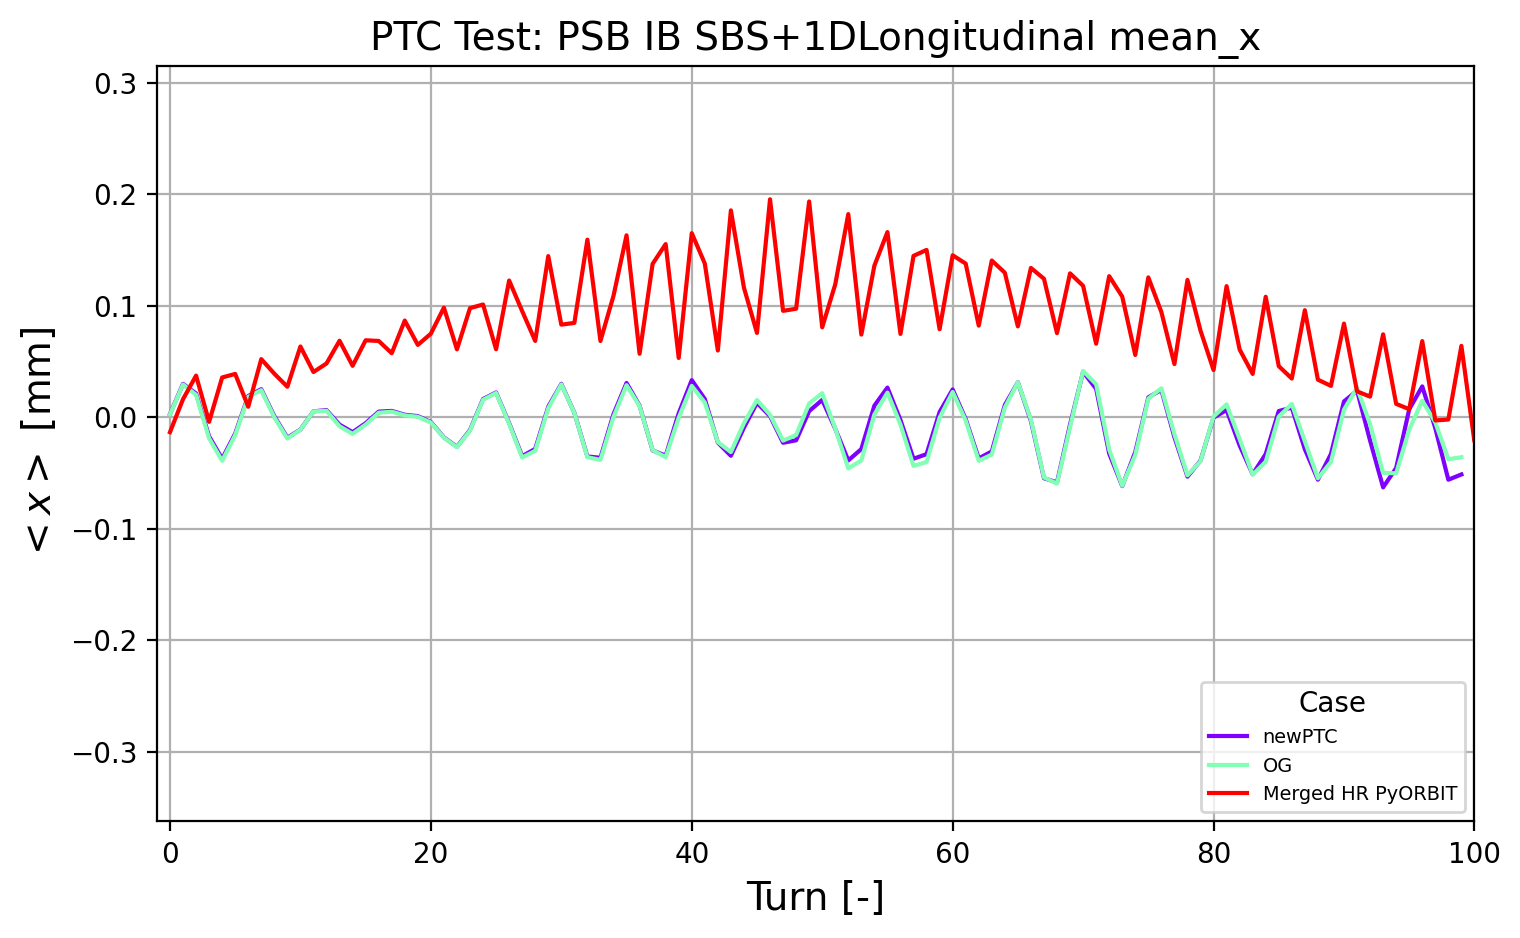

In [12]:
parameter = 'mean_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<x>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()

ax1.set_xlim(-1,turn_tot)

#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

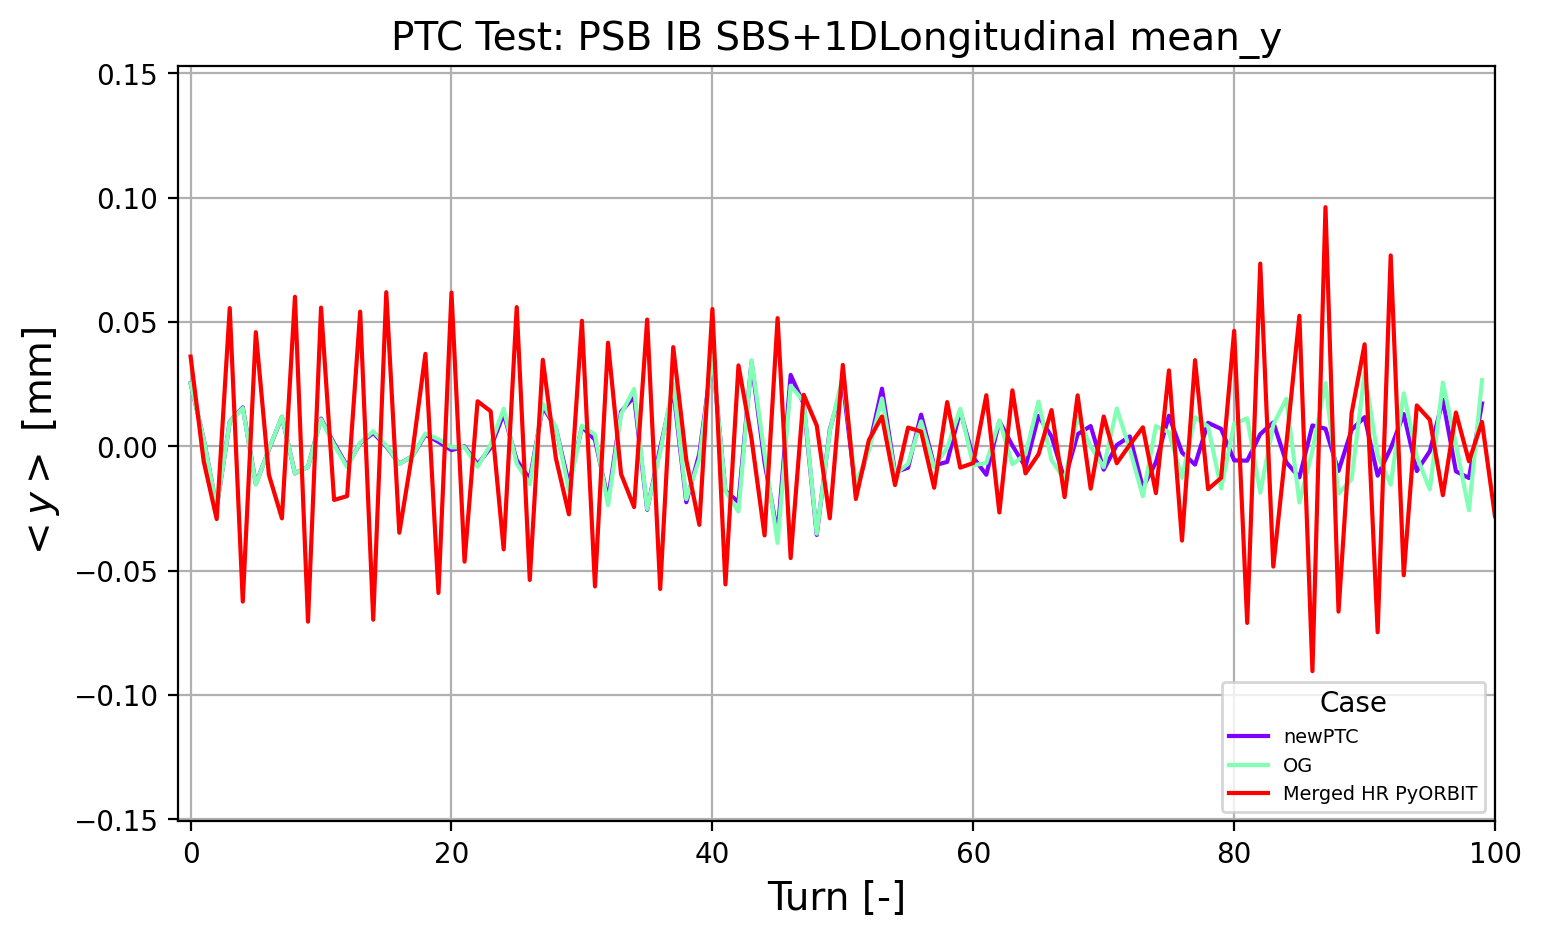

In [13]:
parameter = 'mean_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<y>$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

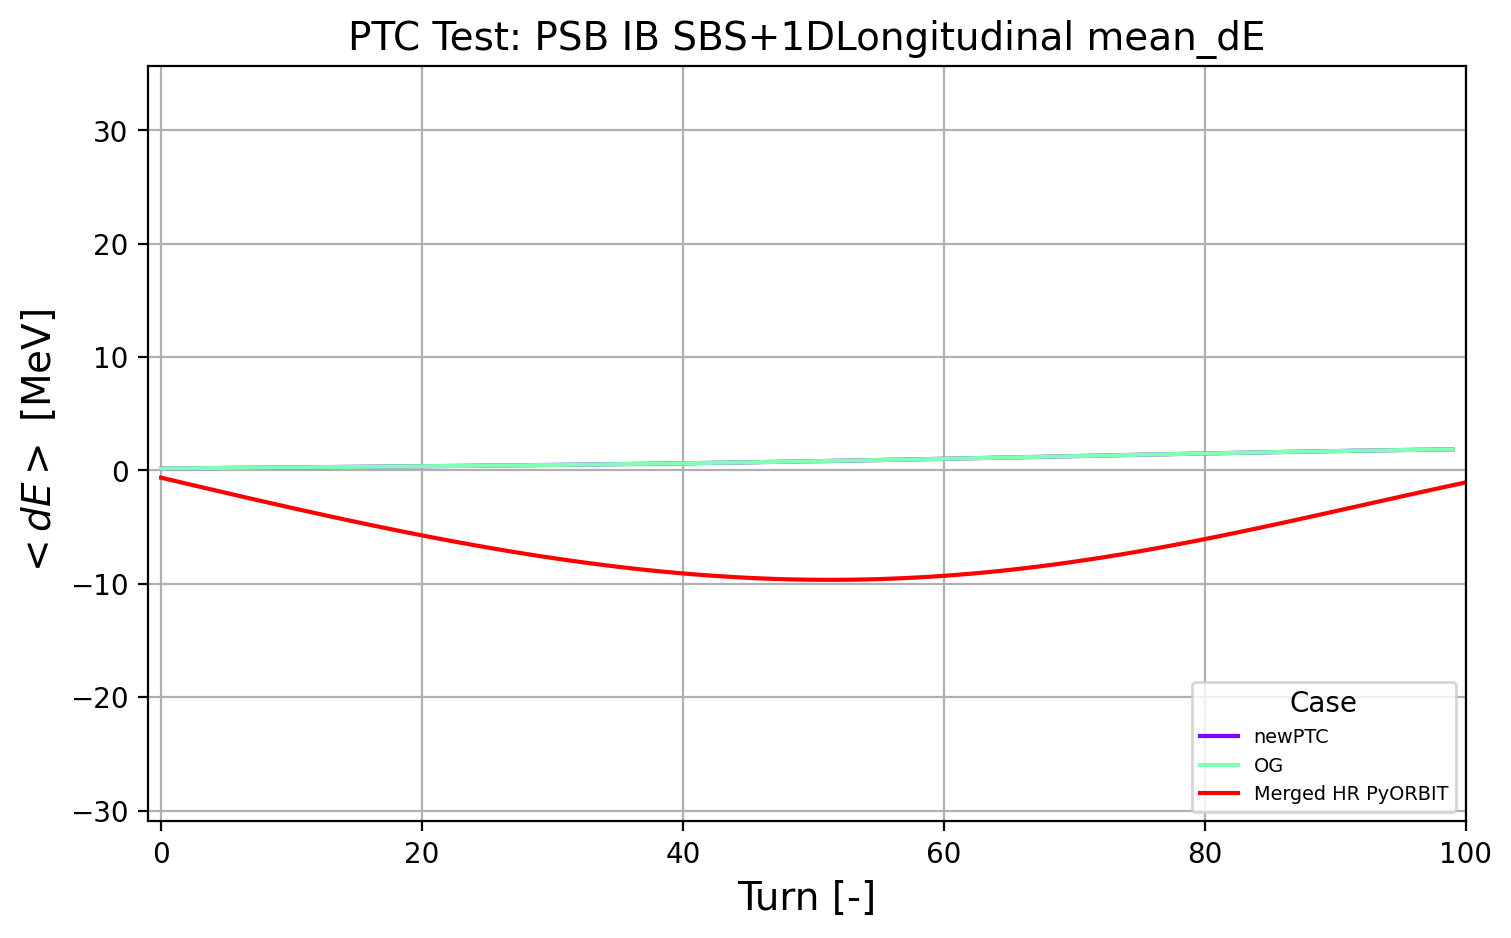

In [14]:
parameter = 'mean_dE'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$<dE>$ [MeV]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

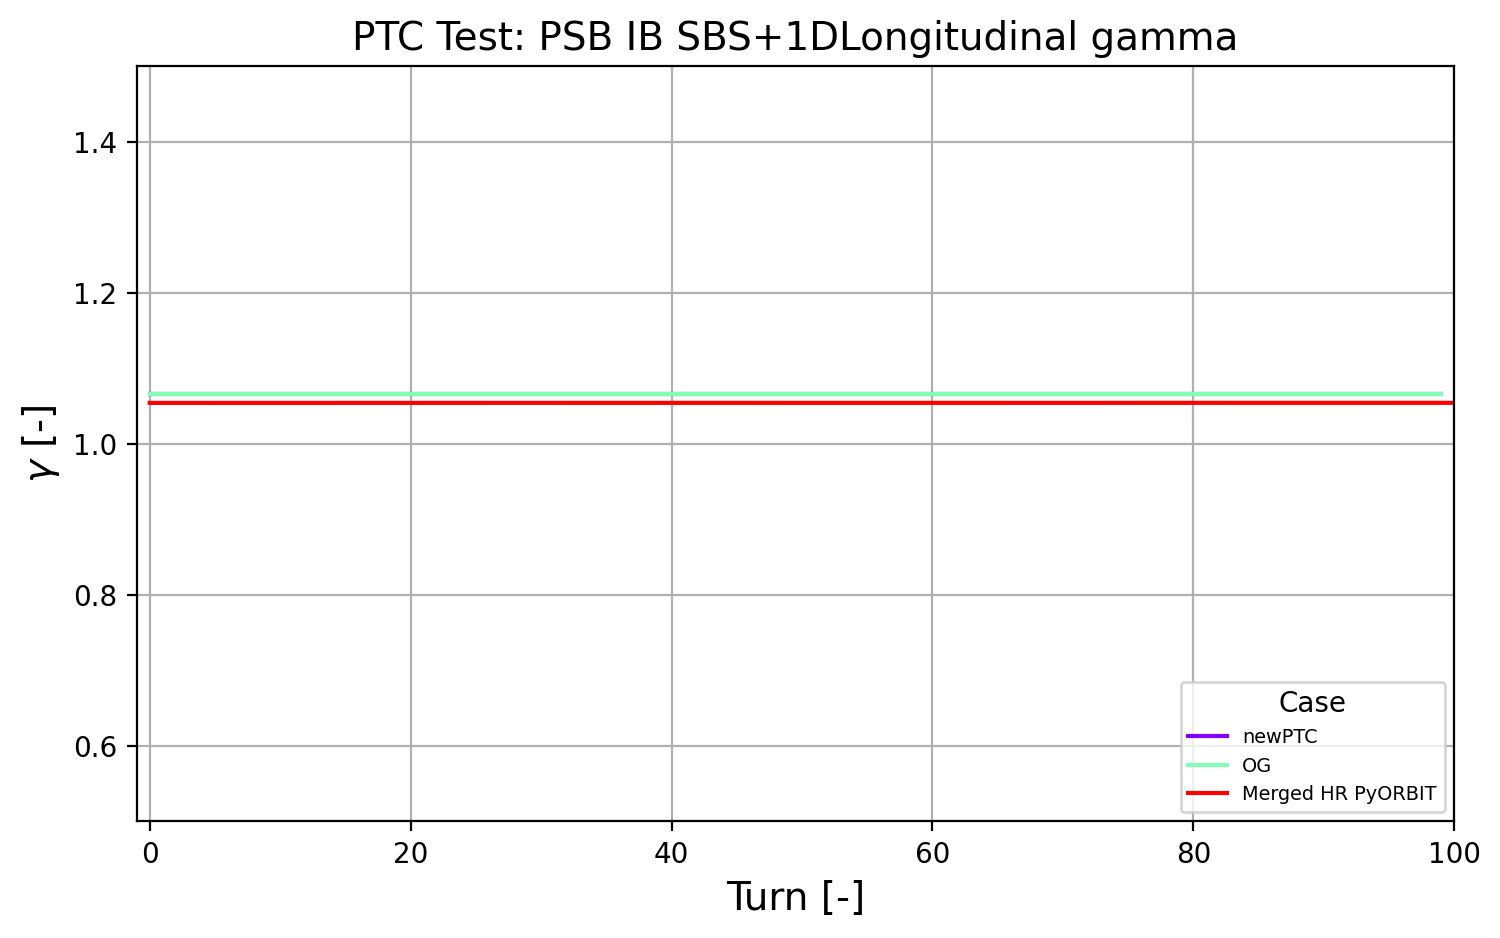

In [15]:
parameter = 'gamma'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\gamma$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
ax1.set_ylim(0.5,1.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

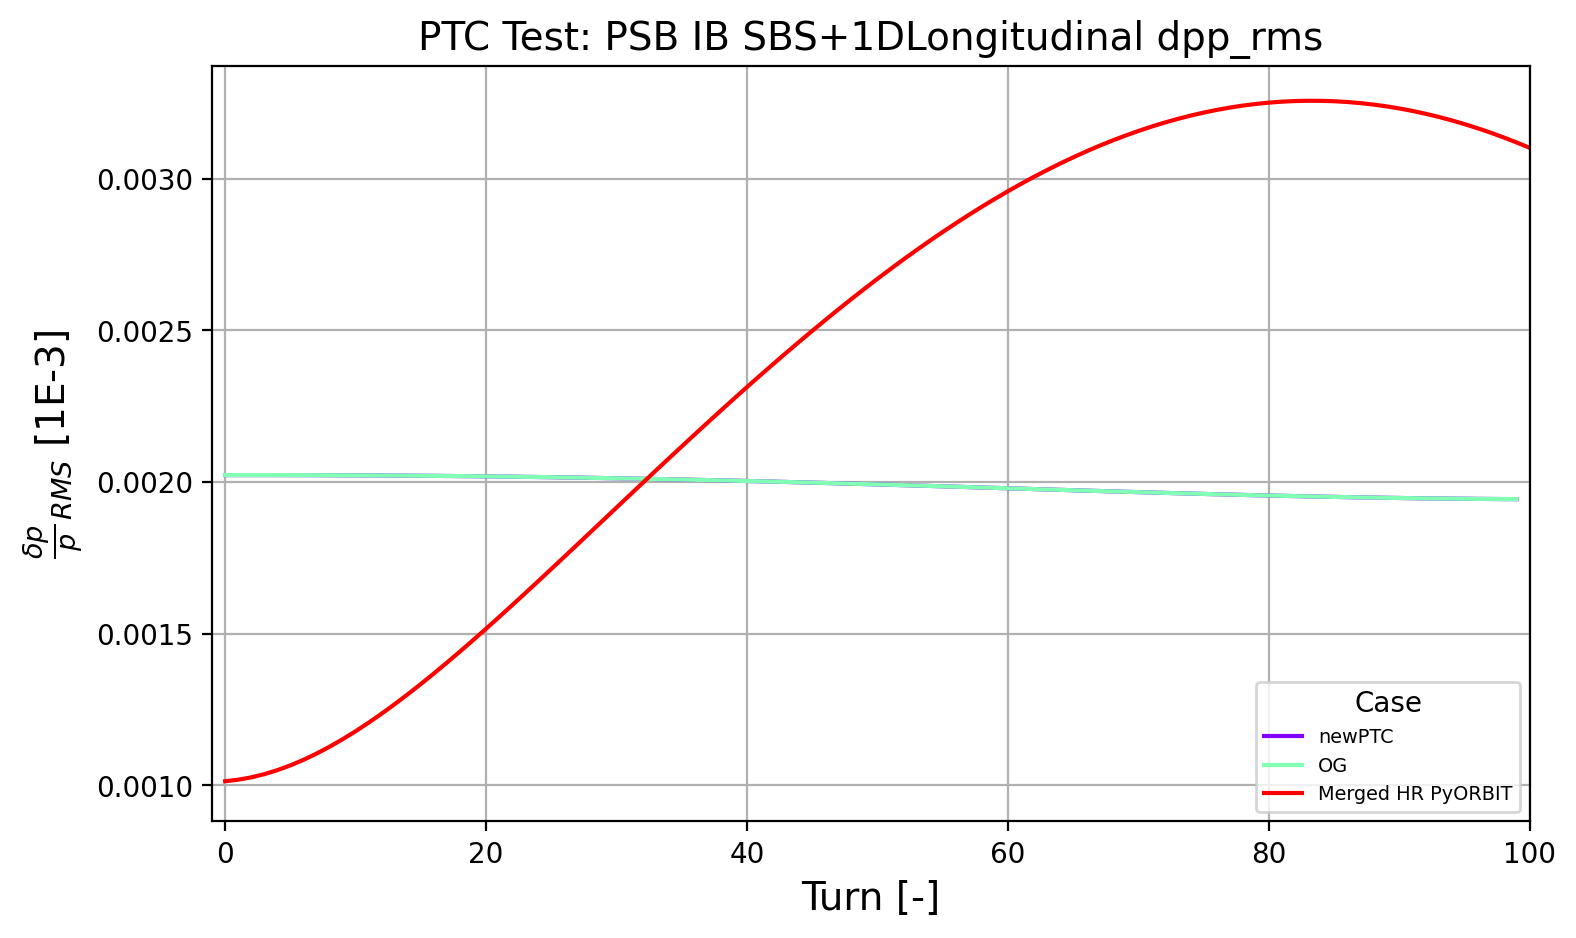

In [16]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

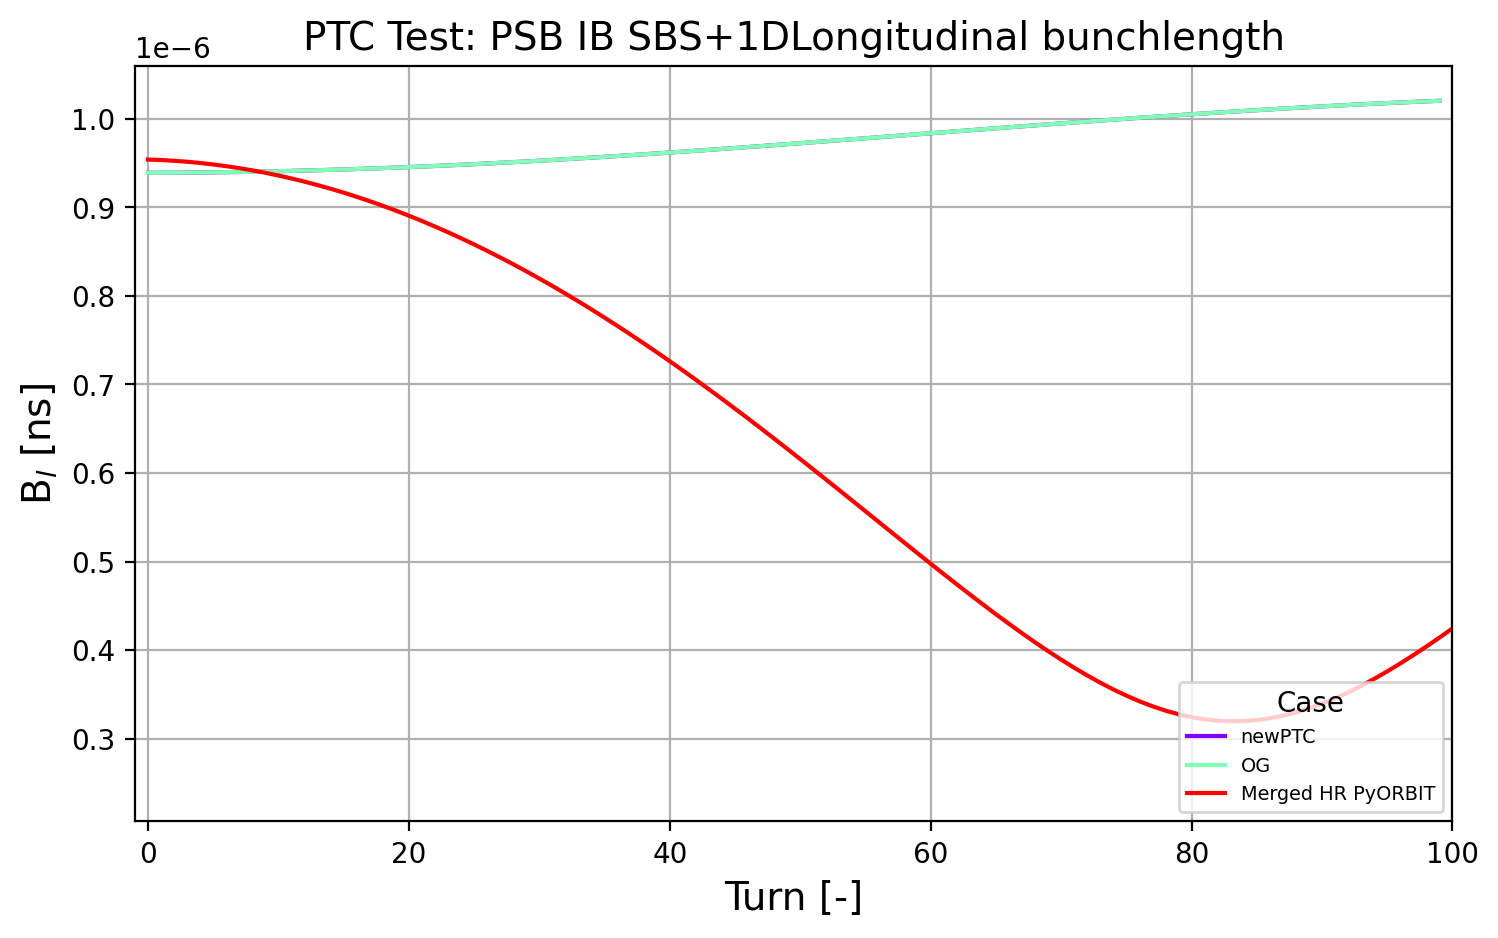

In [17]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

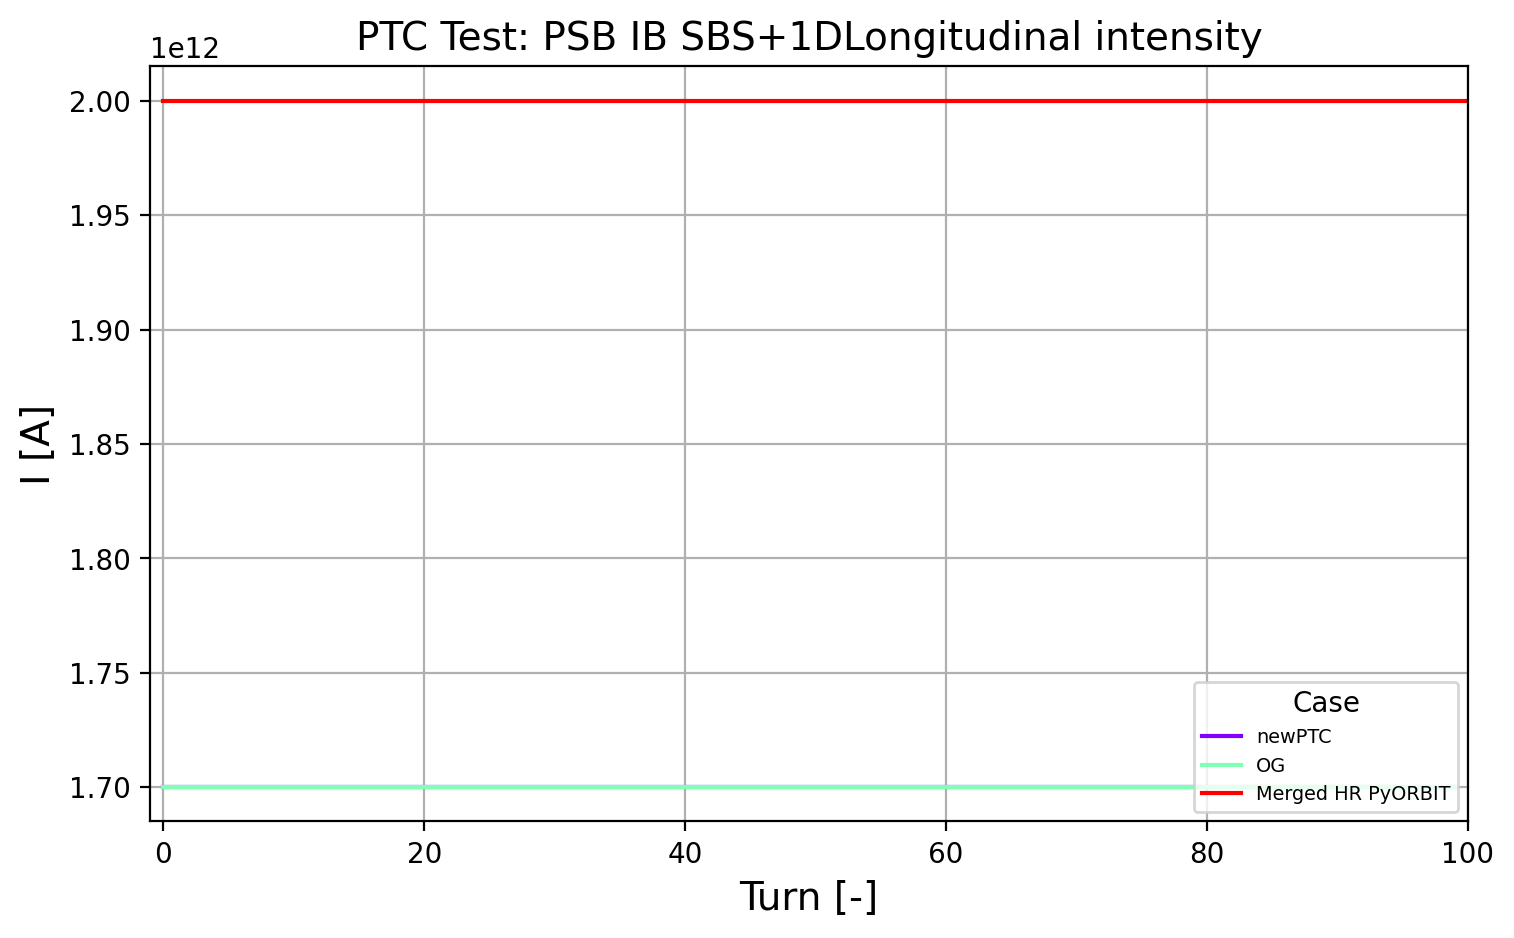

In [18]:
parameter = 'intensity'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('I [A]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

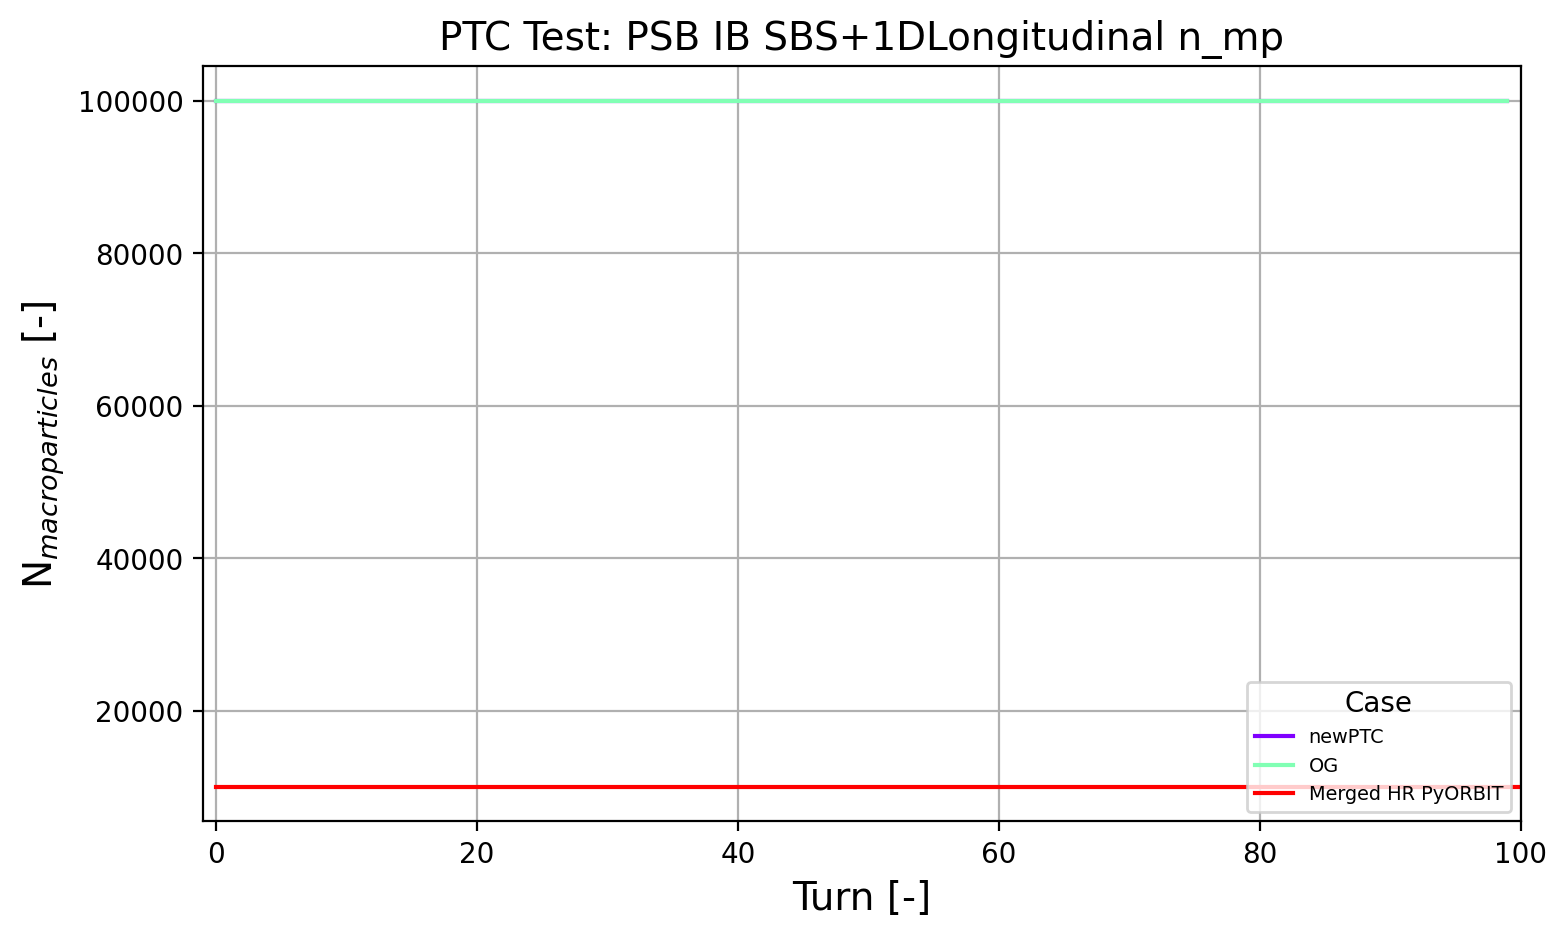

In [19]:
parameter = 'n_mp'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'N$_{macroparticles}$ [-]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

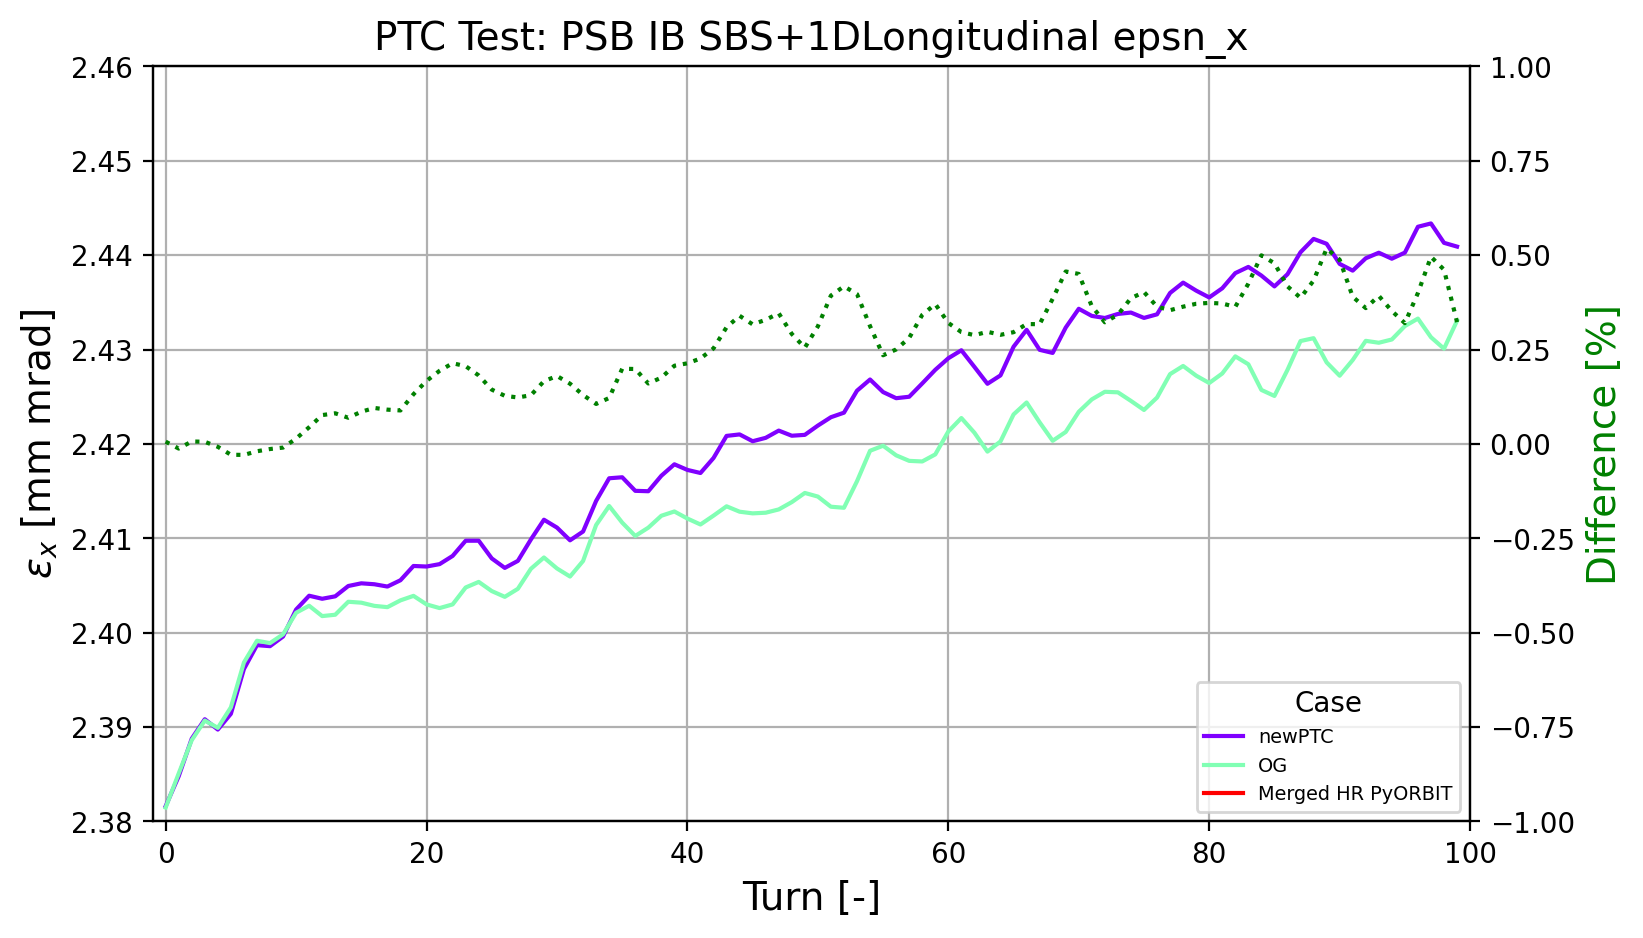

In [20]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax2 = ax1.twinx()
ax2.plot(dd1['OG']['turn'][0], ((dd1['newPTC'][parameter][0]-dd1['OG'][parameter][0])/dd1['OG'][parameter][0])*100, label='Difference [%]', color='g', ls=':')
ax2.set_ylabel('Difference [%]', color='g')
ax2.set_ylim(-1., 1.)

ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
ax1.set_ylim(2.38,2.46)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

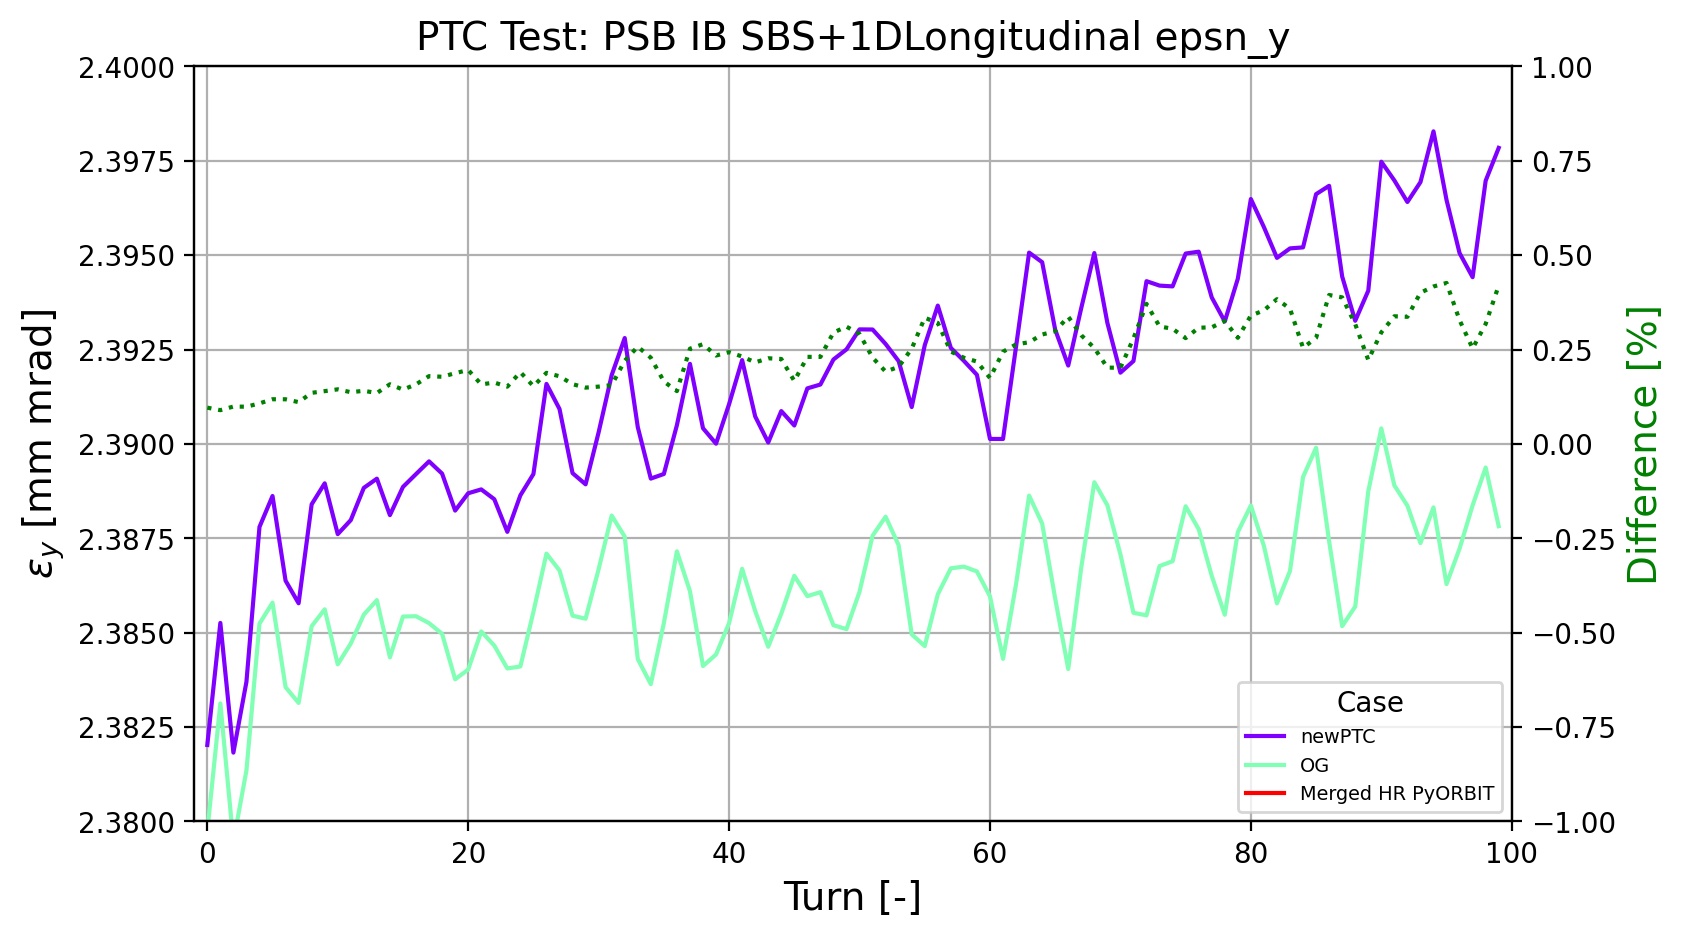

In [21]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*multi, label=key, color=colors[c_it]);
        c_it = c_it + 1;

ax2 = ax1.twinx()
ax2.plot(dd1['OG']['turn'][0], ((dd1['newPTC'][parameter][0]-dd1['OG'][parameter][0])/dd1['OG'][parameter][0])*100, label='Difference [%]', color='g', ls=':')
ax2.set_ylabel('Difference [%]', color='g')
ax2.set_ylim(-1., 1.)
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
ax1.set_ylim(2.38,2.40)

savename = save_folder +'/' + parameter + '.png'
plt.savefig(savename);

newPTC Average  epsn_y  =  2.38  range =  0.0376  =  1.58 %
OG Average  epsn_y  =  2.38  range =  0.0298  =  1.25 %
Merged HR PyORBIT Average  epsn_y  =  1.01  range =  0.00131  =  0.13 %


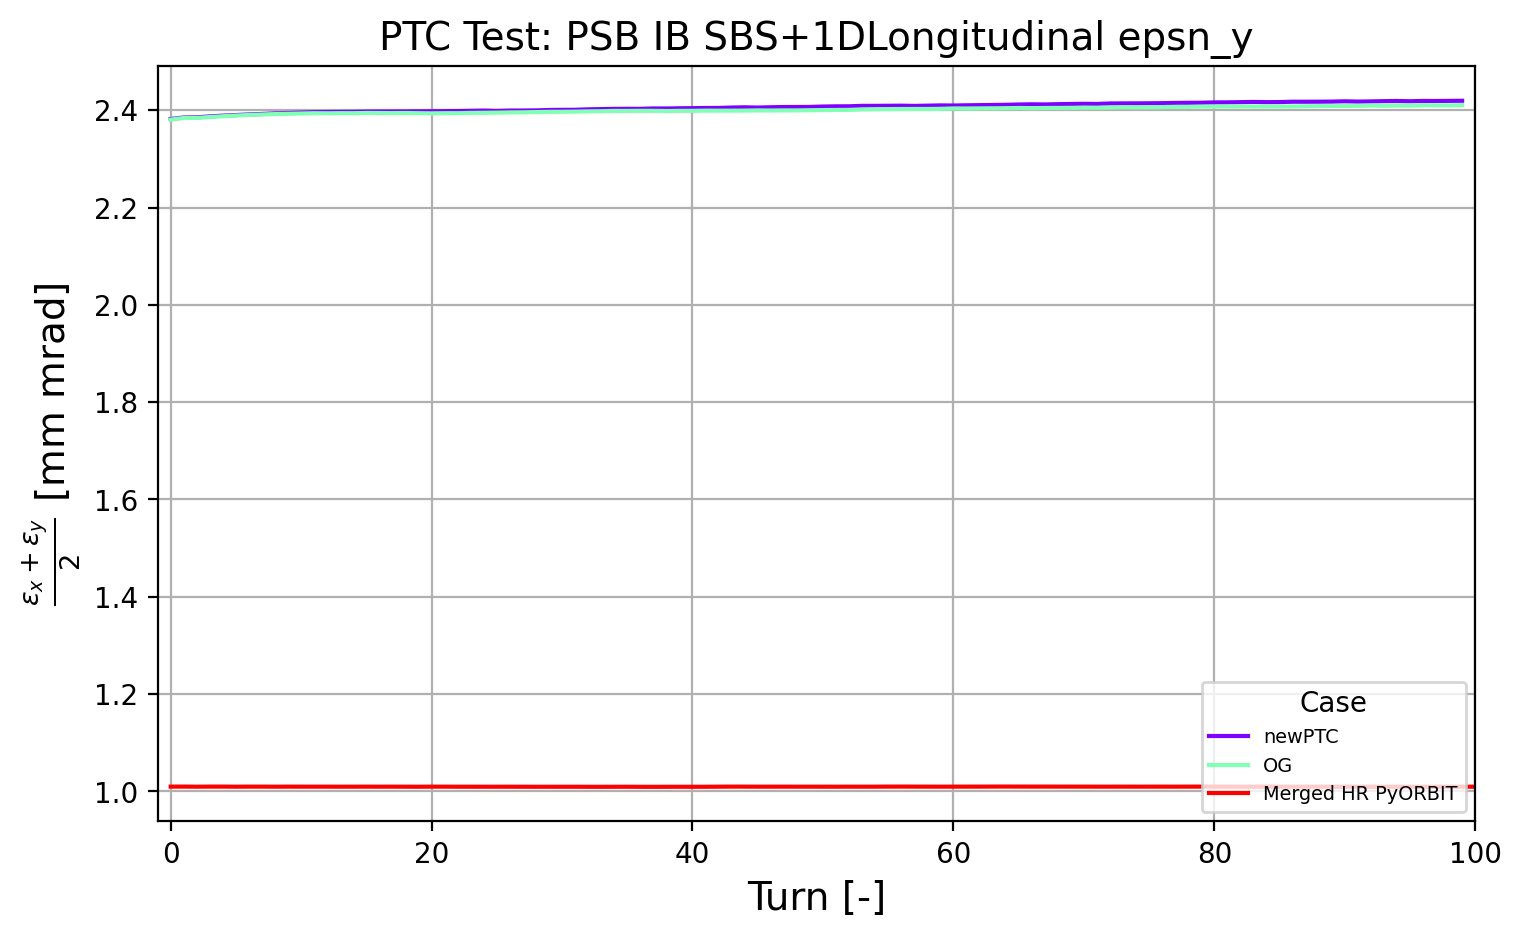

In [22]:
parameter1 = 'epsn_x'
parameter2 = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\epsilon_x + \epsilon_y}{2}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    x = np.array(dd1[key]['turn'][0])
    y = np.array((dd1[key][parameter1][0]*multi + dd1[key][parameter2][0]*multi)/2)
    av_ = np.mean(y[-100])
    rang_ = np.abs(np.max(y) - np.min(y))
    print(key, 'Average ', parameter, ' = ' , \
    str(round_sig(av_)), ' range = ', round_sig(rang_), ' = ', round_sig(rang_/av_)*100, '%')
    lab_ = key
    ax1.plot(x, y, label=lab_, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_average_emittance.png'
plt.savefig(savename);

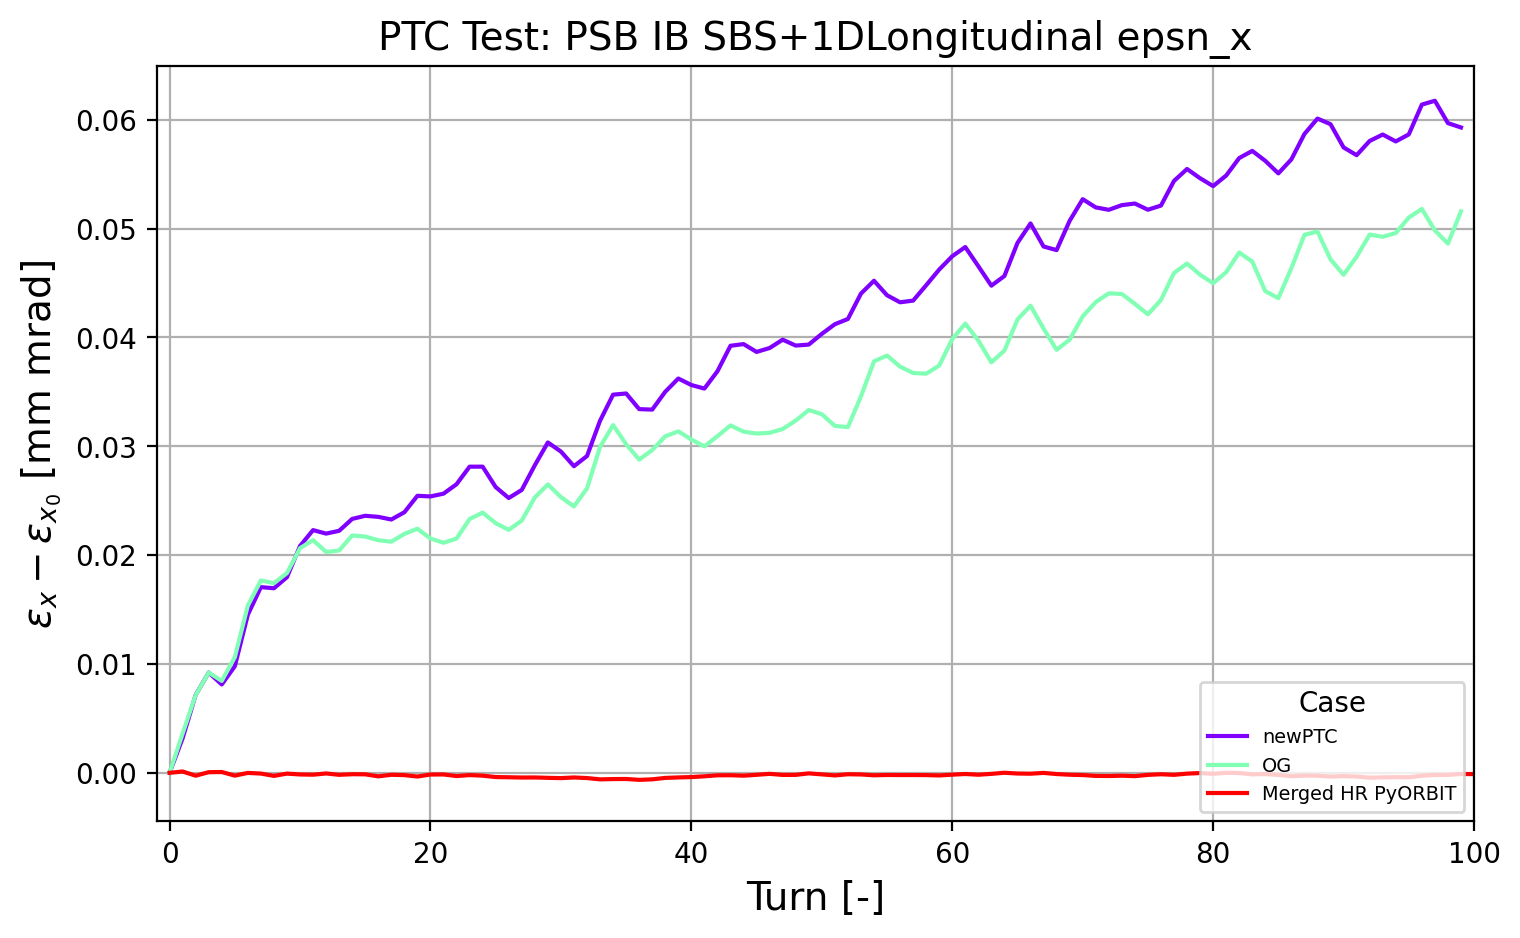

In [23]:
parameter = 'epsn_x'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x-\epsilon_{x_0}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    lab_ = key
    ax1.plot(dd1[key]['turn'][0], ((dd1[key][parameter][0]*multi)-(dd1[key][parameter][0][0]*multi)), label=key, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_growth_cf.png'
plt.savefig(savename);

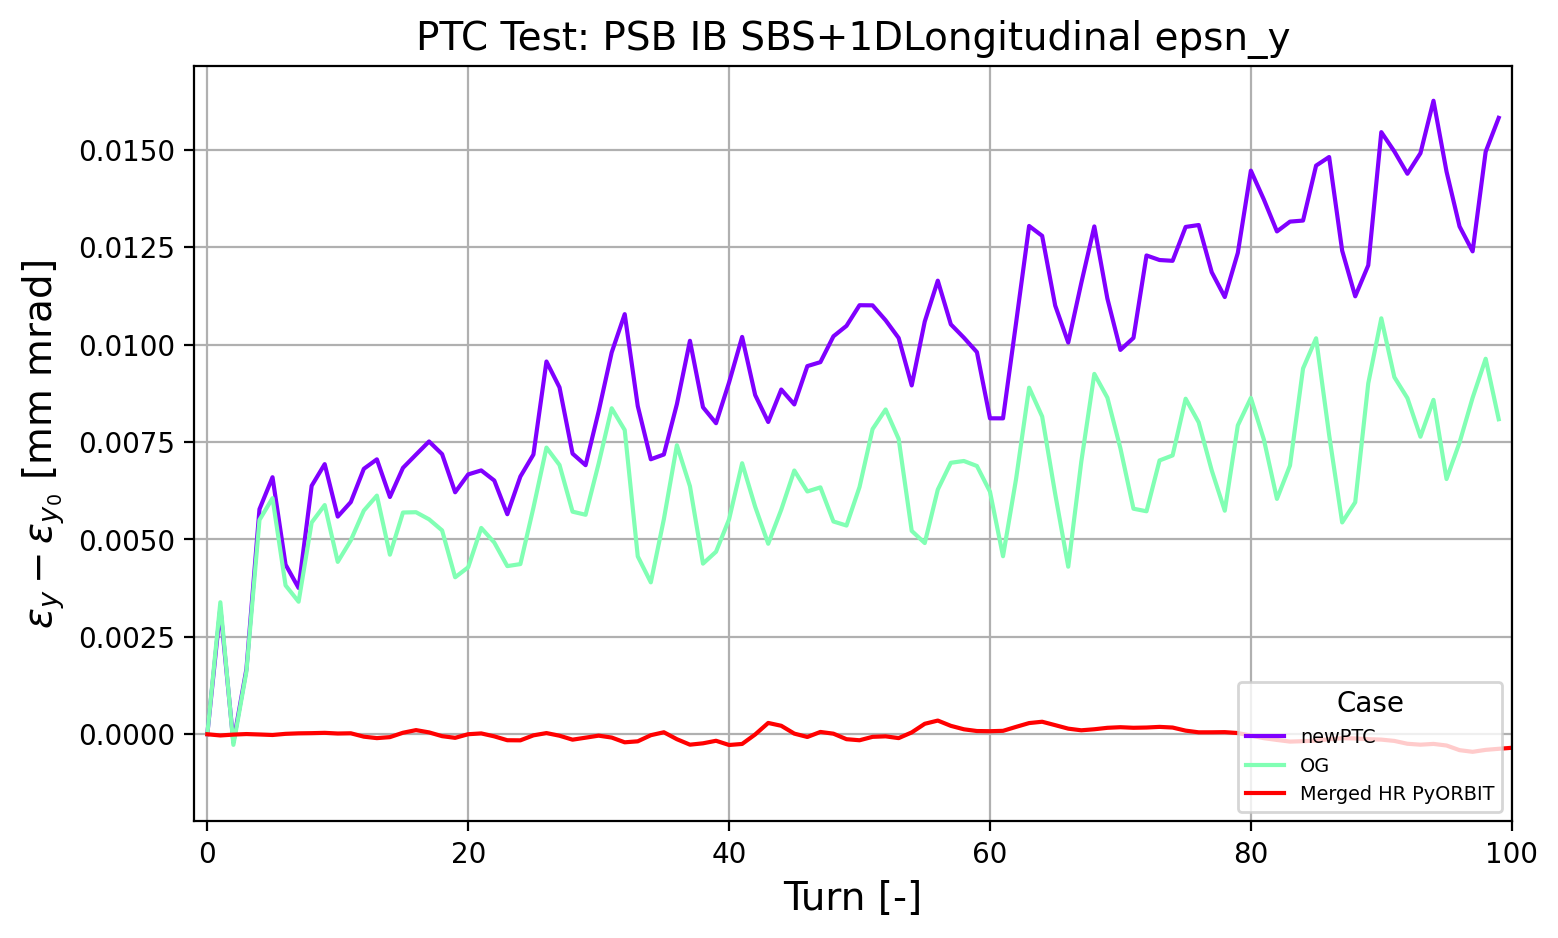

In [24]:
parameter = 'epsn_y'
multi = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y-\epsilon_{y_0}$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.items(), reverse=True):
    lab_ = key
    ax1.plot(dd1[key]['turn'][0], ((dd1[key][parameter][0]*multi)-(dd1[key][parameter][0][0]*multi)), label=key, color=colors[c_it]);
    c_it = c_it + 1;   
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(3,3.5)

savename = save_folder +'/' + parameter + '_growth_cf.png'
plt.savefig(savename);